# **Outline**
1. Import tools
2. Observe Data
3. Define Functions  

  *   3.1 tf()
  *   3.2 idf()
  *   3.3 tf-idf()

4. Try on some test data
5. Try on some target data
6. Visualization

#1. Import tools

In [133]:
import re
import math
from collections import Counter

#2.Observe Data


In [2]:
#test
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"

#3. Define Functions

Different from how we coped with keyness calculation, we are going to calculate tf-idf by feeding in with whole pieces of documents so that we can learn how to includ the pre-processing procedure inside a class method.

In [4]:
def tf(word,doc):
   words = re.split('\s+', doc)
   count = Counter(words)
   return count[word] / sum(count.values())  #sum(count.values()) = len(words)

In [5]:
#Test Your Function  tf()
#Please calculate the tf() values of "的" in these 3 texts
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"

print (tf("的",t1))
print (tf("的",t2))
print (tf("的",t3))

0.037037037037037035
0.05555555555555555
0.0


In [6]:
def idf(word,docset):
  N = len (docset) #total num of doc
  df =0 #要記得先定義df是什麼 空空的才能裝咚咚
  for doc in docset:
    if word in doc.strip().split():
      df+=1
      idf= math.log(N/df) #小心indent
     
      return idf

In [7]:
#Test Your Function  idf()
#Please calculate the idf() values of "的" 
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"

exdocset = [t1,t2,t3] #Be careful: our arg is docset <3
print (idf("的",exdocset))


1.0986122886681098


In [8]:
def tfidf(word,doc,docset):
  return tf(word,doc) * idf(word,docset)

In [8]:
#Test Your Function  tf-idf()
#Please calculate the tf-idf values of "的" in different documents
 
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"


exdocset = [t1,t2,t3] #Be careful: our arg is docset <3<3
print (tfidf("的",t1,exdocset))
print (tfidf("的",t2,exdocset))
print (tfidf("的",t3,exdocset))

0.040689344024744806
0.06103401603711721
0.0


In [9]:
#Think about the meaning of the values
#The (larger) the tf-idf vlaue is , the more important the word is to the target document. 
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"

exdocset = [t1,t2,t3] #Be careful: our arg is docset <3<3
print (tfidf("的",t1,exdocset))
print (tfidf("小明",t1,exdocset))


0.040689344024744806
0.32551475219795845


#4. Try on some test data

Let's calaulate every word in every document so that we can realize which words are special!


In [73]:
#test
t1="下 次 有 人 在 色 瞇瞇 看 著 你 就 大方 的 秀 上述 照片 給 他 看 小明 小明 小明 小明 小明 小明 小明 小明"
t2="當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華"
t3="專門 秀 給 對方 看 可能 會 犯法 不如 把 照片 小白 小白 小白 小白 小白 小白 小白"
exdocset = [t1,t2,t3]


In [74]:
print (exdocset[1])
print (exdocset[1].strip().split())  #餵入的doc 要記得 切成小塊詞 才能讓Counter 吸收

當然 前提 是 你 自己 要 先 承受 的 了 小華 小華 小華 小華 小華 小華 小華 小華
['當然', '前提', '是', '你', '自己', '要', '先', '承受', '的', '了', '小華', '小華', '小華', '小華', '小華', '小華', '小華', '小華']


In [75]:
exdocset = [t1,t2,t3]
scores= {word: tfidf(word,exdocset[0],exdocset) for word in exdocset[0].strip().split() } #這裡要註明for word in exdocset[0] 因為前面沒有定義word
sorted_w =sorted(scores.items(),key=lambda x: x[1],reverse=True)
print (scores)
print (scores.items())
print (list(scores.items())[0]) #we can only index a list not a dictuinary 
print (list(scores.items())[0][0])
print (list(scores.items())[0][1])
print (sorted_w)

{'下': 0.040689344024744806, '次': 0.040689344024744806, '有': 0.040689344024744806, '人': 0.040689344024744806, '在': 0.040689344024744806, '色': 0.040689344024744806, '瞇瞇': 0.040689344024744806, '看': 0.08137868804948961, '著': 0.040689344024744806, '你': 0.040689344024744806, '就': 0.040689344024744806, '大方': 0.040689344024744806, '的': 0.040689344024744806, '秀': 0.040689344024744806, '上述': 0.040689344024744806, '照片': 0.040689344024744806, '給': 0.040689344024744806, '他': 0.040689344024744806, '小明': 0.32551475219795845}
dict_items([('下', 0.040689344024744806), ('次', 0.040689344024744806), ('有', 0.040689344024744806), ('人', 0.040689344024744806), ('在', 0.040689344024744806), ('色', 0.040689344024744806), ('瞇瞇', 0.040689344024744806), ('看', 0.08137868804948961), ('著', 0.040689344024744806), ('你', 0.040689344024744806), ('就', 0.040689344024744806), ('大方', 0.040689344024744806), ('的', 0.040689344024744806), ('秀', 0.040689344024744806), ('上述', 0.040689344024744806), ('照片', 0.040689344024744806), ('給'

In [76]:
for i in range(len(exdocset)): #every document
  
    scores = {word: tfidf(word,exdocset[i],exdocset) for word in exdocset[i].strip().split() }  
                                      #.strip().split()才會是切過的
                                      
          #put them into a dictionary : to sort float values we need to assign key for the values
    sorted_w=sorted(scores.items(),key=lambda x: x[1],reverse=True)
            #call out all the words    #The (larger) the tf-idf vlaue is , the more important the word is to the target document. 
             
    for word, value in sorted_w[:3]: #top three
     #a =range (2010,2025,5)
     a =range (1,4,1)
     print("Top tf-idf in Document {}".format(a[i])) #format(doc)或 format(exdocset[i]) 全文
     print("\tWord: {}, TF-IDF: {}".format(word, round(value, 5)))

Top tf-idf in Document 1
	Word: 小明, TF-IDF: 0.32551
Top tf-idf in Document 1
	Word: 看, TF-IDF: 0.08138
Top tf-idf in Document 1
	Word: 下, TF-IDF: 0.04069
Top tf-idf in Document 2
	Word: 小華, TF-IDF: 0.48827
Top tf-idf in Document 2
	Word: 當然, TF-IDF: 0.06103
Top tf-idf in Document 2
	Word: 前提, TF-IDF: 0.06103
Top tf-idf in Document 3
	Word: 小白, TF-IDF: 0.42724
Top tf-idf in Document 3
	Word: 專門, TF-IDF: 0.06103
Top tf-idf in Document 3
	Word: 秀, TF-IDF: 0.06103


# 5. Try on some target data


In [111]:
!pip install gdown

In [112]:
!gdown --id "1q3DAwlRaK9mApM_rtdSlfAvhLRotMAQH" -O "WomenTalk_2020_seg.txt"
!gdown --id "1FL3bvOmkeqDrgMBWGfoVtxBqvX9R_ebW" -O "WomenTalk_2015_seg.txt"      
!gdown --id "16-XHG9ceyVVWPZ1NSeCyDMoJn0J84L8e" -O "WomenTalk_2010_seg.txt"      

Downloading...
From: https://drive.google.com/uc?id=1q3DAwlRaK9mApM_rtdSlfAvhLRotMAQH
To: /content/WomenTalk_2020_seg.txt
6.67MB [00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FL3bvOmkeqDrgMBWGfoVtxBqvX9R_ebW
To: /content/WomenTalk_2015_seg.txt
3.31MB [00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=16-XHG9ceyVVWPZ1NSeCyDMoJn0J84L8e
To: /content/WomenTalk_2010_seg.txt
100% 1.04M/1.04M [00:00<00:00, 69.4MB/s]


In [113]:
with open('/content/WomenTalk_2010_seg.txt') as f:
  W10_doc = f.read().strip()
with open('/content/WomenTalk_2015_seg.txt') as f:
  W15_doc = f.read().strip()
with open('/content/WomenTalk_2020_seg.txt') as f:
  W20_doc = f.read().strip() 

A class method can help us process the data more efficiently by combining the pverlapped parts.

In [114]:
class TF_IDF():
  def __init__(self, docset):
    self.N = len(docset)
    self.doc_word_freq = []  # 記錄資訊以供 self.tf() 計算      #a list
    self.doc_size = []       # 記錄資訊以供 self.tf() 計算
    self.idf_cache = {}      # 記錄已經算過的 idf 分數      # a dictionary

    for doc in docset:
      words = doc.strip().split()
      self.doc_size.append(len(words))
      self.doc_word_freq.append(Counter(words))
  

  def tf(self, word, doc_idx):    #doc_idx  doc index : put in each doc
   return self.doc_word_freq[doc_idx][word] / self.doc_size[doc_idx]   #doc_size = sum(count.values()) = len(doc)
          #the words of each doc


  def idf(self, word):
    if word in self.idf_cache:
      return self.idf_cache[word]

    df = 0 #要記得先定義df是什麼
    for doc in self.doc_word_freq:
      if word in doc: df += 1
    idf = math.log(self.N/df)
    self.idf_cache[word] = idf
    return idf
  

  def tfidf(self, word, doc_idx):
    return self.tf(word, doc_idx) * self.idf(word)

In [115]:
import time
start_time = time.time()

exdocset = [W10_doc,W15_doc,W20_doc]
docset = TF_IDF(exdocset)

tfidf_scores = {}
for i in range(len(exdocset)):
  tfidf_scores[f"doc_{i}"] = {}
  word_freq = docset.doc_word_freq[i]
  for word in word_freq:
    score = docset.tfidf(word, i)
    tfidf_scores[f"doc_{i}"][word] = score

process_time = time.time() - start_time
print(process_time)

0.709932804107666


In [116]:
#女人心 海底針 撈撈每年的針
# 印出各個 doc tf-idf 分數前十名
for i in range(len(exdocset)):
  top_n_scored = sorted(tfidf_scores[f'doc_{i}'].items(), key=lambda x:x[1], reverse=True)
  for word, value in top_n_scored[:10]:
    a =range (2010,2025,5)
    print("Top tf-idf in WomenTalk {}".format(a[i])) #format(doc)或 format(exdocset[i]) 全文
    print("\tWord: {}, TF-IDF: {}".format(word, round(value, 5)))

Top tf-idf in WomenTalk 2010
	Word: giva, TF-IDF: 0.0004
Top tf-idf in WomenTalk 2010
	Word: 暈車藥, TF-IDF: 0.00032
Top tf-idf in WomenTalk 2010
	Word: diess, TF-IDF: 0.00022
Top tf-idf in WomenTalk 2010
	Word: diesss, TF-IDF: 0.00017
Top tf-idf in WomenTalk 2010
	Word: 830, TF-IDF: 0.00016
Top tf-idf in WomenTalk 2010
	Word: suchin, TF-IDF: 0.00015
Top tf-idf in WomenTalk 2010
	Word: 煞車, TF-IDF: 0.00013
Top tf-idf in WomenTalk 2010
	Word: 板上, TF-IDF: 0.00012
Top tf-idf in WomenTalk 2010
	Word: 010, TF-IDF: 0.00012
Top tf-idf in WomenTalk 2010
	Word: 蘇美, TF-IDF: 0.00011
Top tf-idf in WomenTalk 2015
	Word: 禁言, TF-IDF: 0.00207
Top tf-idf in WomenTalk 2015
	Word: 國慶爺, TF-IDF: 0.0006
Top tf-idf in WomenTalk 2015
	Word: ○使用, TF-IDF: 0.00047
Top tf-idf in WomenTalk 2015
	Word: ott, TF-IDF: 0.00039
Top tf-idf in WomenTalk 2015
	Word: 娘娘, TF-IDF: 0.00032
Top tf-idf in WomenTalk 2015
	Word: 小雪, TF-IDF: 0.0003
Top tf-idf in WomenTalk 2015
	Word: 慶爺, TF-IDF: 0.0002
Top tf-idf in WomenTalk 2015
	Wor

In [ ]:
#Your trun: the top 10 tf-idf words of the two boards: 
#Board 1
1QvmzgrelbcfKWCFra7Yegq7FoWqGVfyL
Gossiping_2010_seg
#Board 2
16-XHG9ceyVVWPZ1NSeCyDMoJn0J84L8e
WomenTalk_2010_seg

In [117]:
!gdown --id "1QvmzgrelbcfKWCFra7Yegq7FoWqGVfyL" -O "Gossiping_2010_seg.txt"
!gdown --id "16-XHG9ceyVVWPZ1NSeCyDMoJn0J84L8e" -O "WomenTalk_2010_seg.txt"      


Downloading...
From: https://drive.google.com/uc?id=1QvmzgrelbcfKWCFra7Yegq7FoWqGVfyL
To: /content/Gossiping_2010_seg.txt
100% 1.83M/1.83M [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=16-XHG9ceyVVWPZ1NSeCyDMoJn0J84L8e
To: /content/WomenTalk_2010_seg.txt
100% 1.04M/1.04M [00:00<00:00, 68.7MB/s]


In [118]:
with open('/content/Gossiping_2010_seg.txt') as f:
  G10_doc = f.read().strip()
with open('/content/WomenTalk_2010_seg.txt') as f:
  W10_doc = f.read().strip()


In [119]:
import time
start_time = time.time()

exdocset = [G10_doc,W10_doc]
docset = TF_IDF(exdocset)

tfidf_scores = {}
for i in range(len(exdocset)):
  tfidf_scores[f"doc_{i}"] = {}
  word_freq = docset.doc_word_freq[i]
  for word in word_freq:
    score = docset.tfidf(word, i)
    tfidf_scores[f"doc_{i}"][word] = score

process_time = time.time() - start_time
print(process_time)

0.2528078556060791


In [120]:
# 印出各個 doc tf-idf 分數前十名

for i in range(len(exdocset)):
  
  top_n_scored = sorted(tfidf_scores[f'doc_{i}'].items(), key=lambda x:x[1], reverse=True)
  print (i) 
  print (top_n_scored[:10])

0
[('○使用', 0.0026207321806537864), ('Ptt', 0.0021198548489110764), ('藍天', 0.0021119670169151283), ('枚', 0.0020843596049293094), ('北蘇新倫', 0.0016189775171683663), ('綠地', 0.0013251557753192961), ('北郝新英', 0.000494961457745749), ('李登輝', 0.0003904476837994355), ('黨工', 0.00037072810380956497), ('OD', 0.00032931698583083696)]
1
[('性騷擾', 0.0008328698458309157), ('生日', 0.00043043273545043126), ('暈車', 0.00037444148531053773), ('giva', 0.0002554600787632641), ('灑花', 0.00020296828175711394), ('暈車藥', 0.00020296828175711394), ('蘇美', 0.0001854710160883972), ('男朋友', 0.00015047648475096376), ('女孩板', 0.00013647867221599038), ('diess', 0.00013647867221599038)]


In [121]:
# 印出各個 doc tf-idf 分數前十名
a=["Gossiping_2010","WomenTalk_2010"]
for i in range(len(exdocset)):
  top_n_scored = sorted(tfidf_scores[f'doc_{i}'].items(), key=lambda x:x[1], reverse=True)
  print("Top tf-idf in {}".format(a[i]))
  for word, value in top_n_scored[:10]: 
    print("\tWord: {}, TF-IDF: {}".format(word, round(value, 5)))  

Top tf-idf in Gossiping_2010
	Word: ○使用, TF-IDF: 0.00262
	Word: Ptt, TF-IDF: 0.00212
	Word: 藍天, TF-IDF: 0.00211
	Word: 枚, TF-IDF: 0.00208
	Word: 北蘇新倫, TF-IDF: 0.00162
	Word: 綠地, TF-IDF: 0.00133
	Word: 北郝新英, TF-IDF: 0.00049
	Word: 李登輝, TF-IDF: 0.00039
	Word: 黨工, TF-IDF: 0.00037
	Word: OD, TF-IDF: 0.00033
Top tf-idf in WomenTalk_2010
	Word: 性騷擾, TF-IDF: 0.00083
	Word: 生日, TF-IDF: 0.00043
	Word: 暈車, TF-IDF: 0.00037
	Word: giva, TF-IDF: 0.00026
	Word: 灑花, TF-IDF: 0.0002
	Word: 暈車藥, TF-IDF: 0.0002
	Word: 蘇美, TF-IDF: 0.00019
	Word: 男朋友, TF-IDF: 0.00015
	Word: 女孩板, TF-IDF: 0.00014
	Word: diess, TF-IDF: 0.00014


#6. Visualization

In [138]:
import matplotlib
# 下載台北思源黑體
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為台北思源黑體
matplotlib.rc('font', family = 'Taipei Sans TC Beta')

--2020-12-10 13:04:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.79.100, 173.194.79.138, 173.194.79.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfad09m9vagjemu0k9vtc2c4lb4g7cv3/1607605425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2020-12-10 13:04:25--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfad09m9vagjemu0k9vtc2c4lb4g7cv3/1607605425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|108.1

Top tf-idf in Gossiping_2010
   word     value
0   ○使用  0.002621
1   Ptt  0.002120
2    藍天  0.002112
3     枚  0.002084
4  北蘇新倫  0.001619
5    綠地  0.001325
6  北郝新英  0.000495
7   李登輝  0.000390
8    黨工  0.000371
9    OD  0.000329


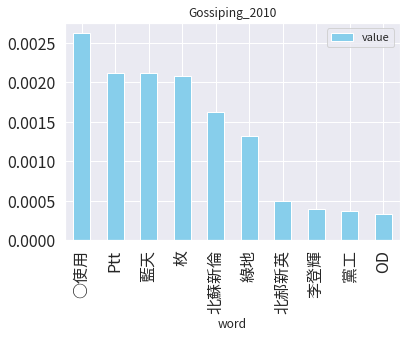

Top tf-idf in WomenTalk_2010
    word     value
0    性騷擾  0.000833
1     生日  0.000430
2     暈車  0.000374
3   giva  0.000255
4     灑花  0.000203
5    暈車藥  0.000203
6     蘇美  0.000185
7    男朋友  0.000150
8    女孩板  0.000136
9  diess  0.000136


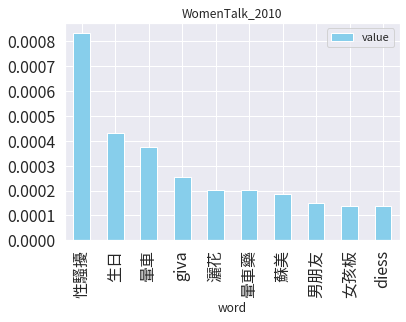

In [147]:
a=["Gossiping_2010","WomenTalk_2010"]

import pandas as pd
import matplotlib.pyplot as plt
for i in range(len(exdocset)):
  top_n_scored = sorted(tfidf_scores[f'doc_{i}'].items(), key=lambda x:x[1], reverse=True)
  data = top_n_scored[:10]
  df = pd.DataFrame (data, columns = ['word','value'])
  print("Top tf-idf in {}".format(a[i]))
  print (df) #to present the data in df format
  
  df.plot(x="word", y="value",kind="bar",title=a[i],fontsize=16,color='skyblue') #to draw the picture for each dataset
  plt.show()

#https://realpython.com/pandas-plot-python/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://datatofish.com/create-pandas-dataframe/

In [129]:
print(df['word'])

0      性騷擾
1       生日
2       暈車
3     giva
4       灑花
5      暈車藥
6       蘇美
7      男朋友
8      女孩板
9    diess
Name: word, dtype: object


In [ ]:
#built-in function
#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76